Author: Nik Alleyne<br>
Author Blog:    https://www.securitynik.com <br>
Author GitHub:  github.com/securitynik <br>
Author Books: 
        [ 
                
                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/"
        ]


### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.

## 25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.



In [87]:
# Read some necessary libraries
import numpy as np
import os
import glob

In [88]:
# Create a list to store the executable file paths
exe_files_list = []

# Append the file and paths in a particular directory to the list
for file_name in glob.glob(pathname='d:/TOOLS/*.exe'):
    print(f'[*] Appending {file_name} to exe_files_list')

    # Adding the files to the list
    exe_files_list.append(file_name)

print(f'Added {len(exe_files_list)} files')

[*] Appending d:/TOOLS\7z1604-x64.exe to exe_files_list
[*] Appending d:/TOOLS\7z1604.exe to exe_files_list
[*] Appending d:/TOOLS\7z1801-x64.exe to exe_files_list
[*] Appending d:/TOOLS\7z1805.exe to exe_files_list
[*] Appending d:/TOOLS\7z1900-x64.exe to exe_files_list
[*] Appending d:/TOOLS\7z1900.exe to exe_files_list
[*] Appending d:/TOOLS\AccessData_FTK_Imager-_4.3.0.exe to exe_files_list
[*] Appending d:/TOOLS\AnalyzePESig.exe to exe_files_list
[*] Appending d:/TOOLS\bintext.exe to exe_files_list
[*] Appending d:/TOOLS\burpsuite_community_windows-x64_v2_1_07.exe to exe_files_list
[*] Appending d:/TOOLS\ca_setup.exe to exe_files_list
[*] Appending d:/TOOLS\CFF_ExplorerSuite.exe to exe_files_list
[*] Appending d:/TOOLS\chml.exe to exe_files_list
[*] Appending d:/TOOLS\ChromeSetup.exe to exe_files_list
[*] Appending d:/TOOLS\ChromeStandaloneSetup64.exe to exe_files_list
[*] Appending d:/TOOLS\ciHexViewer.exe to exe_files_list
[*] Appending d:/TOOLS\codeblocks-20.03-setup.exe to exe

In [89]:
# Review the list 
exe_files_list

['d:/TOOLS\\7z1604-x64.exe',
 'd:/TOOLS\\7z1604.exe',
 'd:/TOOLS\\7z1801-x64.exe',
 'd:/TOOLS\\7z1805.exe',
 'd:/TOOLS\\7z1900-x64.exe',
 'd:/TOOLS\\7z1900.exe',
 'd:/TOOLS\\AccessData_FTK_Imager-_4.3.0.exe',
 'd:/TOOLS\\AnalyzePESig.exe',
 'd:/TOOLS\\bintext.exe',
 'd:/TOOLS\\burpsuite_community_windows-x64_v2_1_07.exe',
 'd:/TOOLS\\ca_setup.exe',
 'd:/TOOLS\\CFF_ExplorerSuite.exe',
 'd:/TOOLS\\chml.exe',
 'd:/TOOLS\\ChromeSetup.exe',
 'd:/TOOLS\\ChromeStandaloneSetup64.exe',
 'd:/TOOLS\\ciHexViewer.exe',
 'd:/TOOLS\\codeblocks-20.03-setup.exe',
 'd:/TOOLS\\cola_soft_pktbuilder_2.0.0.212.exe',
 'd:/TOOLS\\Comodo-ForensicAnalysisTool_MzUxNDQx.exe',
 'd:/TOOLS\\DeleteRecordofFileEx.exe',
 'd:/TOOLS\\devcpp-4.9.9.2_setup.exe',
 'd:/TOOLS\\DiskImageFreeSetup.exe',
 'd:/TOOLS\\DokanSetup.exe',
 'd:/TOOLS\\dotNetFx45_Full_setup.exe',
 'd:/TOOLS\\EventExplorer_setup.exe',
 'd:/TOOLS\\ExplorerSuite.exe',
 'd:/TOOLS\\filealyz-2.0.5.57.exe',
 'd:/TOOLS\\findjump2.exe',
 'd:/TOOLS\\Firefox Setup

In [90]:
# Take a sample file
# This produces the following output for the first 8 bytes
# Note, change the values below if you wish to see more bytes
# I'm using 8 for easier clarity of the output

# We need to get out of this binary format
f = open(file=exe_files_list[0], mode='rb')
f.read(8)

b'MZ\x90\x00\x03\x00\x00\x00'

In [91]:
# Let's get these values into hex
# https://stackoverflow.com/questions/6624453/whats-the-correct-way-to-convert-bytes-to-a-hex-string-in-python-3
# https://docs.python.org/3/library/stdtypes.html#bytes.hex
# This output looks much better.
# Now that they are in hex, we need to get this as int
f = open(file=exe_files_list[0], mode='rb')

# Store these bytes in a variable
f.read(8).hex(sep=' ', bytes_per_sep=1)

'4d 5a 90 00 03 00 00 00'

In [92]:
# Read the data from a sample file
f = open(file=exe_files_list[0], mode='rb')

# Read 8 bytes of the data, convert the binary data to hex with 2 characters representing a byte
# Remember, you can change the 8 to 256 or some other value if you wish
# split the data on the space to setup a list of hex chars
bytes_to_hex = f.read(8).hex(sep=' ', bytes_per_sep=1).split(' ')
print(bytes_to_hex)

['4d', '5a', '90', '00', '03', '00', '00', '00']


In [93]:
# While the above is in a list, it is all hex string.
# Still need to get this to int
# https://www.rapidtables.com/convert/number/hex-to-decimal.html

# Convert each item in the list to a 16 bit integer
[ int(i, 16) for i in bytes_to_hex ]

[77, 90, 144, 0, 3, 0, 0, 0]

In [94]:
# Knowing that above works, let's now get this into a numpy array
# Put above in an numpy array
# This gives us what we need. We have the foundation in place to now put everything together
np.array([ int(i, 16) for i in bytes_to_hex ])

array([ 77,  90, 144,   0,   3,   0,   0,   0])

In [95]:
# Putting together, all that was done above

# Define an empty list
exe_array = []

# First create a for loop consisting of all that we just defined
for file in exe_files_list:
    # print the file if needed
    # print(file)

    # Read the data from a sample file as binary data
    f = open(file=file, mode='rb')

    # Read 8 bytes of the data, convert the binary data to hex with 2 characters representing a byte
    # You can change the 8 below in the read statement to read a larger number of bytes
    # I'm trying to make it easily readable
    # split the data on the space to setup a list of hex chars
    bytes_to_hex = f.read(8).hex(sep=' ', bytes_per_sep=1).split(' ')

    # Convert the hex characters to 16 bits integer
    xi = ([ int(i, 16) for i in bytes_to_hex ])

    # Append the integers to the exe_array
    exe_array.append(xi)

In [96]:
# Review the array with the items
print(exe_array)

[[77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 96, 0, 1, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 4, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 80, 0, 2,

In [97]:
# make the list into a numpy array
X = np.array(object=exe_array, dtype=float)
X

array([[ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90.,  80.,   0.,   2.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90.,  80.,   0.,

In [98]:
# Get the shape of X_train
# This tells us the number of samples executables and the number of bytes 
X.shape

(61, 8)

In [99]:
# Let's prepare to plot these 8 bytes as an image
from matplotlib import pyplot as plt

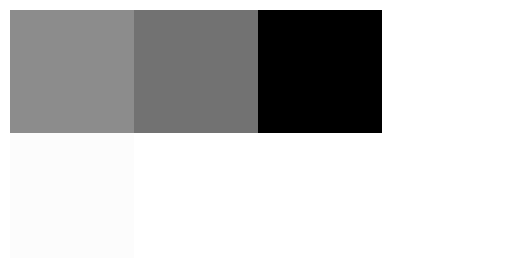

In [100]:
# Before passing through the convolution operation, let's look at the first 8 bytes of one executable as an image
plt.imshow(np.array(X[0], ndmin=2).reshape(2,4), cmap='Greys')
plt.axis('off')
plt.show()

With the executables now available in a format we can use for machine and deep learning <br> 
and since there are no labels, we can use anomaly, outlier or novelty detection via sklearn. <br>
See this link: https://scikit-learn.org/stable/modules/outlier_detection.html <br><br>

If you wish to do anomaly detection via autoencoder,<br>
see this link: https://www.tensorflow.org/tutorials/generative/autoencoder#third_example_anomaly_detection

In [101]:
# Prepare to save the numpy array above
import joblib

In [102]:
# Save the executables numpy array to a  file
joblib.dump(value=X, filename='exe_file_array.npy')

['exe_file_array.npy']

In [103]:
# load the file containing the numpy array of the executables
loaded_np_array = joblib.load(filename='exe_file_array.npy')
loaded_np_array

array([[ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90.,  80.,   0.,   2.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90.,  80.,   0.,

Generate some random labels for the purpose of this notebook <br>
Note, I'm not aware of any of the files uses her being malicious. <br>
But because I wish to demonstrate supervise learning, I will add some random labels <br>

In [104]:
# Generate some random labels/targets for a binary classification problem
y = np.random.randint(low=0, high=2, size=X.shape[0])
y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [105]:
# Remember, y needs to be reshaped as a new column to be able to stack horizontally
# via a 
y.reshape(-1,1)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [106]:
# Stack the two to create a dataframe if needed
np.hstack(tup=(X, y.reshape(-1, 1)))

array([[ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90.,  80.,   0.,   2.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,

In [107]:
# With that in place, let's build a quick machine learning model to do supervised learning
from sklearn.linear_model import LogisticRegression

In [108]:
# Setup a machine learning model using Logistic Regression
lr = LogisticRegression().fit(X=X, y=y)
lr

LogisticRegression()

In [109]:
# How did the model do on the training set?
# Get some metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [110]:
# Get the accuracy score on the training data
accuracy_score(y_true=y, y_pred=lr.predict(X=X))

0.5409836065573771

In [111]:
# Prettify the confusion matrix
import seaborn as sns

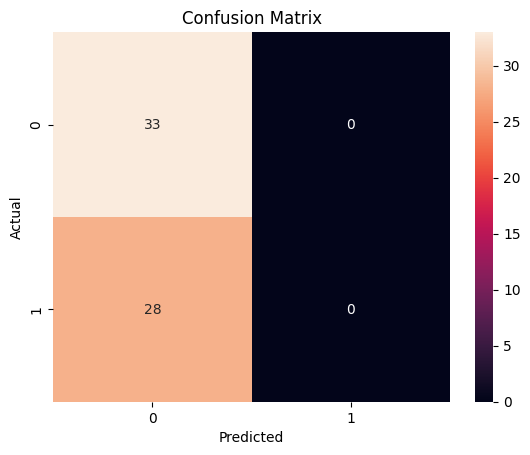

In [112]:
# Get the confusion matrix
# Looking at the confusion matrix, This does not seem so bad
# We learned about metrics in notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y, y_pred=lr.predict(X=X)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [113]:
# Print the classification report
print(classification_report(y_true=y, y_pred=lr.predict(X=X)))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        33
           1       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61



C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [114]:
# Let's wrap this up by build a quick neural network
import tensorflow as tf

In [115]:
# Before getting to Conv2D, it is important that we understand, 
# the conv2d process is not responsible for converting the executable to an image.
# The executable bytes goes through the convolution process.
# We then visualize the operation just as we did above with the raw bytes

sample = np.array(X[0], ndmin=2).reshape(1,1,2,4)
sample


# Create a conv2D layer in Tensorflow
conv = tf.keras.layers.Conv2D(filters=1, kernel_size=(2,2), strides=(1,1), padding='same' )(sample)
conv

<tf.Tensor: shape=(1, 1, 2, 1), dtype=float32, numpy=
array([[[[73.04614   ],
         [ 0.41949373]]]], dtype=float32)>

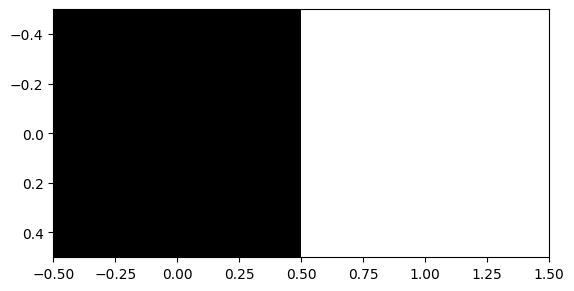

In [116]:
# Plot an image of the first 8 bytes after the convolution operation
plt.imshow(np.squeeze(conv, axis=0), cmap='Greys')

In [117]:
# Once again, just to be clear above, the convolution process did not convert the executable to an image.
# It is just that we produced an image from the result of the conv2D process

In [118]:
# Setup a neural network
# Note because we already discussed convolution networks in notebooks:
#   19 - Beginning Deep Learning - Convolution Networks - Tensorflow
#   20 - Beginning Deep Learning - Convolution Networks - PyTorch
# I'm not going to go further with it here.

# However, I will built a simple neural network to make predictions on those executables
model = tf.keras.Sequential(name='exe_sequential')

# Setup the input layer
model.add(tf.keras.layers.Input(shape=(X.shape[1],), name='exe_input_layer' ))

# Add one dense layer
model.add(tf.keras.layers.Dense(units=8, activation='relu', use_bias=True, name='hidden_layer'))

# Add a dropout layer for regularization. Drop 20 percent of the neurons
model.add(tf.keras.layers.Dropout(rate=0.2))

# Add the final output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', name='output_layer'))

model.summary()

Model: "exe_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


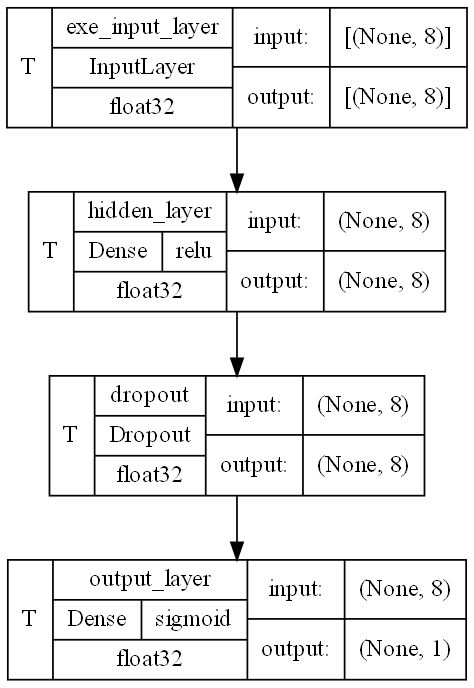

In [119]:
# Get a diagram of the model
tf.keras.utils.plot_model(model=model, show_dtype=True, show_layer_activations=True, \
                          show_layer_names=True, show_shapes=True, show_trainable=True, dpi=125)

In [120]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [121]:
# Fit the model
history = model.fit(x=X, y=y, epochs=10, verbose=1, callbacks=None, validation_split=0.2, shuffle=True)

Epoch 1/10
2/2 [==============================] - 2s 404ms/step - loss: 26.3065 - accuracy: 0.4583 - val_loss: 17.1918 - val_accuracy: 0.5385
Epoch 2/10
2/2 [==============================] - 0s 64ms/step - loss: 26.7671 - accuracy: 0.5000 - val_loss: 16.6396 - val_accuracy: 0.5385
Epoch 3/10
2/2 [==============================] - 0s 48ms/step - loss: 21.3196 - accuracy: 0.5000 - val_loss: 16.0590 - val_accuracy: 0.5385
Epoch 4/10
2/2 [==============================] - 0s 49ms/step - loss: 23.6498 - accuracy: 0.5000 - val_loss: 15.5313 - val_accuracy: 0.5385
Epoch 5/10
2/2 [==============================] - 0s 56ms/step - loss: 15.5089 - accuracy: 0.6042 - val_loss: 14.9991 - val_accuracy: 0.5385
Epoch 6/10
2/2 [==============================] - 0s 61ms/step - loss: 20.7655 - accuracy: 0.5000 - val_loss: 14.3247 - val_accuracy: 0.5385
Epoch 7/10
2/2 [==============================] - 0s 72ms/step - loss: 16.2207 - accuracy: 0.5833 - val_loss: 13.6184 - val_accuracy: 0.5385
Epoch 8/10
2

In [122]:
# What does the history callback look like?
history.history

{'loss': [26.30647850036621,
  26.767053604125977,
  21.319639205932617,
  23.649810791015625,
  15.508915901184082,
  20.765501022338867,
  16.220685958862305,
  24.711105346679688,
  16.9891414642334,
  18.165075302124023],
 'accuracy': [0.4583333432674408,
  0.5,
  0.5,
  0.5,
  0.6041666865348816,
  0.5,
  0.5833333134651184,
  0.4375,
  0.5625,
  0.5208333134651184],
 'val_loss': [17.19179916381836,
  16.63956642150879,
  16.05898094177246,
  15.531304359436035,
  14.999149322509766,
  14.32465934753418,
  13.618375778198242,
  12.907623291015625,
  12.169377326965332,
  11.40538501739502],
 'val_accuracy': [0.5384615659713745,
  0.5384615659713745,
  0.5384615659713745,
  0.5384615659713745,
  0.5384615659713745,
  0.5384615659713745,
  0.5384615659713745,
  0.5384615659713745,
  0.5384615659713745,
  0.5384615659713745]}

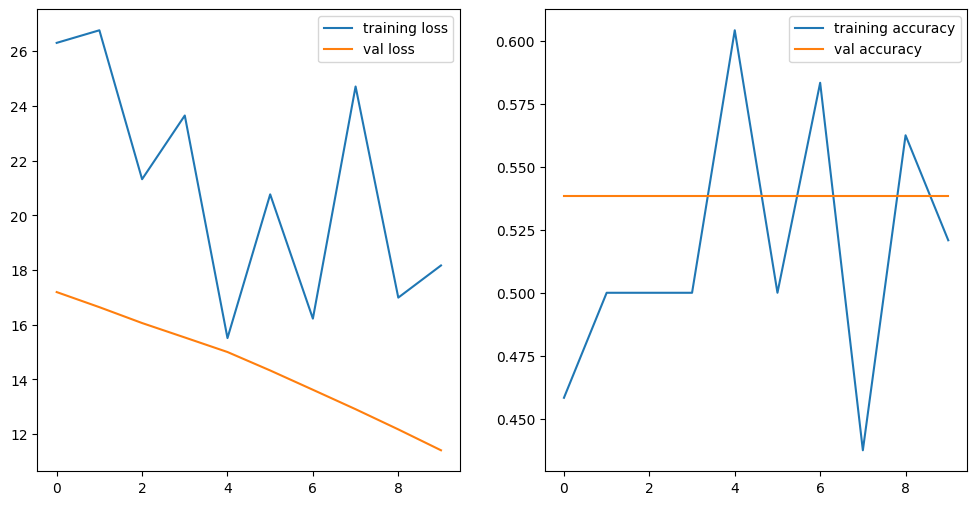

In [123]:
# Plot the loss and accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='val accuracy')
ax2.legend()

In [124]:
# Create deep learning model with PyTorch
import torch
import torchinfo

In [125]:
# Setup a torch model using the Sequential Class
torch_clf_model = torch.nn.Sequential(
    torch.nn.Linear(in_features=X.shape[1], out_features=8),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.2),
    torch.nn.Linear(in_features=8, out_features=1),
    torch.nn.Sigmoid()
)

In [126]:
# Get the summary of the model
torchinfo.summary(torch_clf_model)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            72
├─ReLU: 1-2                              --
├─Dropout: 1-3                           --
├─Linear: 1-4                            9
├─Sigmoid: 1-5                           --
Total params: 81
Trainable params: 81
Non-trainable params: 0

In [127]:
# We need to change our data into a Torch Tensor
# Currently it is in 
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [128]:
# To use the data in pytorch we need to change it to a torch tensor. 
# Ensure the data types are all the same
X = torch.tensor(data=X, dtype=torch.float32)

# Notice the reshaping of y also
y = torch.tensor(data=y.reshape(-1,1), dtype=torch.float32)

# Validate the change
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [129]:
# In the following notebooks:
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
# the training was all done outside of a function. Rather than rewriting the same code all the time
# time to create a function
def torch_training(model=None, epochs=10, learning_rate=0.01, x_train=X, y_train=y, x_test=X, y_test=y):
    ''' Performs training of the model '''
    # Create to lists to save the training and test loss respectively 
    training_loss, validation_loss = [], []

    # Setup the loss function
    clf_loss_fn = torch.nn.BCELoss()

    # Setup the optimizer
    clf_optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        # Clear the gradients
        clf_optimizer.zero_grad()

        # Train the model
        model.train()

        # Make predictions on the training data
        train_preds = model(x_train)
    
        # Get the loss
        train_loss = clf_loss_fn(train_preds, y_train)
        training_loss.append(train_loss)

        # Calculate the gradients
        train_loss.backward()

        # Upgrade the gradients
        clf_optimizer.step()

        # Evaluate the model at the same time
        model.eval()
        with torch.inference_mode():
            val_preds = model(X)

            # Calculate the loss on the validation data
            val_loss = clf_loss_fn(val_preds, y_test)
            validation_loss.append(val_loss)

        if epoch %10 == 0:
            print(f'Epoch: {epoch} \t training loss: {train_loss} \t validation loss {val_loss}')
    
    return model, training_loss, validation_loss

In [130]:
# Call the function with the associated parameters
#(model, train_loss, val_loss) = torch_training(model=torch_clf_model, epochs=300, learning_rate=0.01)
torch_clf_model = torch_training(model=torch_clf_model, epochs=300, learning_rate=0.01)

Epoch: 0 	 training loss: 10.293257713317871 	 validation loss 8.576501846313477
Epoch: 10 	 training loss: 12.118088722229004 	 validation loss 2.499680757522583
Epoch: 20 	 training loss: 1.7484749555587769 	 validation loss 0.8840962648391724
Epoch: 30 	 training loss: 0.9213913083076477 	 validation loss 0.6988810300827026
Epoch: 40 	 training loss: 0.6909291744232178 	 validation loss 0.704102635383606
Epoch: 50 	 training loss: 0.7156347632408142 	 validation loss 0.6958518624305725
Epoch: 60 	 training loss: 0.71307373046875 	 validation loss 0.6930334568023682
Epoch: 70 	 training loss: 0.6858772039413452 	 validation loss 0.6903567314147949
Epoch: 80 	 training loss: 0.6857439279556274 	 validation loss 0.6893384456634521
Epoch: 90 	 training loss: 0.686129093170166 	 validation loss 0.6888721585273743
Epoch: 100 	 training loss: 0.6893190741539001 	 validation loss 0.6876587867736816
Epoch: 110 	 training loss: 0.683178186416626 	 validation loss 0.6875321865081787
Epoch: 120

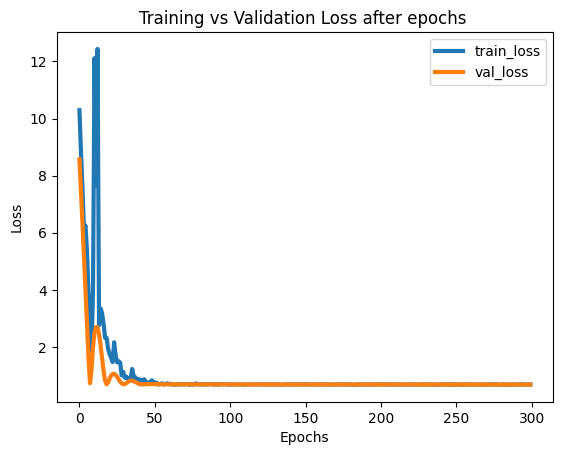

In [131]:
# Plotting the training loss values
plt.title(f'Training vs Validation Loss after epochs ')

# Trying to plot on the "training_loss" by itself will not work
# Matplotlib will more than likely throw an error
# Hence we needed to do "torch.tensor(training_loss).detach().numpy()"
plt.plot(torch.tensor(torch_clf_model[1]).detach().numpy(), lw=3, label='train_loss')
plt.plot(torch.tensor(torch_clf_model[2]).detach().numpy(), lw=3, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [132]:
# Make predictions on the test set
# We see the values are continuous
with torch.inference_mode():
    test_preds = torch_clf_model[0](X)

test_preds

tensor([[0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4406],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4406],
        [0.4416],
        [0.4790],
        [0.4790],
        [0.4406],
        [0.4790],
        [0.4790],
        [0.4406],
        [0.4406],
        [0.4406],
        [0.4790],
        [0.4790],
        [0.2469],
        [0.4790],
        [0.4406],
        [0.4406],
        [0.4406],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4790],
        [0.4427],
        [0.4790],
        [0.4406],
        [0.4422],
        [0.4427],
        [0.4790],
        [0.4790],
        [0.4406],
        [0.4790],
        [0.4406],
        [0.4790],
        [0.4406],
        [0

In [133]:
# Notice the rounding of the predictions
# Above we got the probabilities. Can't use the probabilities here
accuracy_score(y_true=y, y_pred=np.round(test_preds))

0.5409836065573771

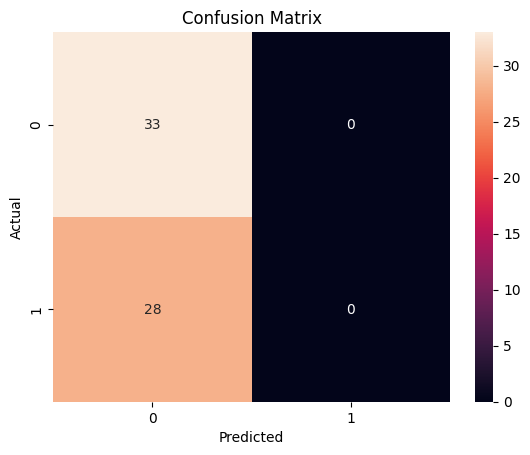

In [134]:
# Looking at the confusion matrix, This does not seem so bad
# We learned about metrics in notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y, y_pred=np.round(test_preds)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [135]:
# Review the classification report
print(classification_report(y_true=y, y_pred=np.round(test_preds)))

              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70        33
         1.0       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61



C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [136]:
# Well that's it!